## Import data

In [2]:
directory <- getwd()
filepath <- paste(directory, "/data/top2000_2018.csv", sep = "")
top2000 <- read.csv(filepath, 
                    header = TRUE, stringsAsFactors = FALSE)

## Number of unique artists

In [3]:
artists_per_song <- top2000[, 3]
unique_artists <- sort(unique(artists_per_song))

In [4]:
cat(length(unique_artists), "unique artists found in top2000 chart of 2018")

817 unique artists found in top2000 chart of 2018

## Number of hits per artist

Beatles             Queen          Coldplay    Rolling Stones 
               38                33                26                26 
               U2              ABBA Bruce Springsteen   Michael Jackson 
               23                22                22                22 
      David Bowie     Fleetwood Mac 
               19                18

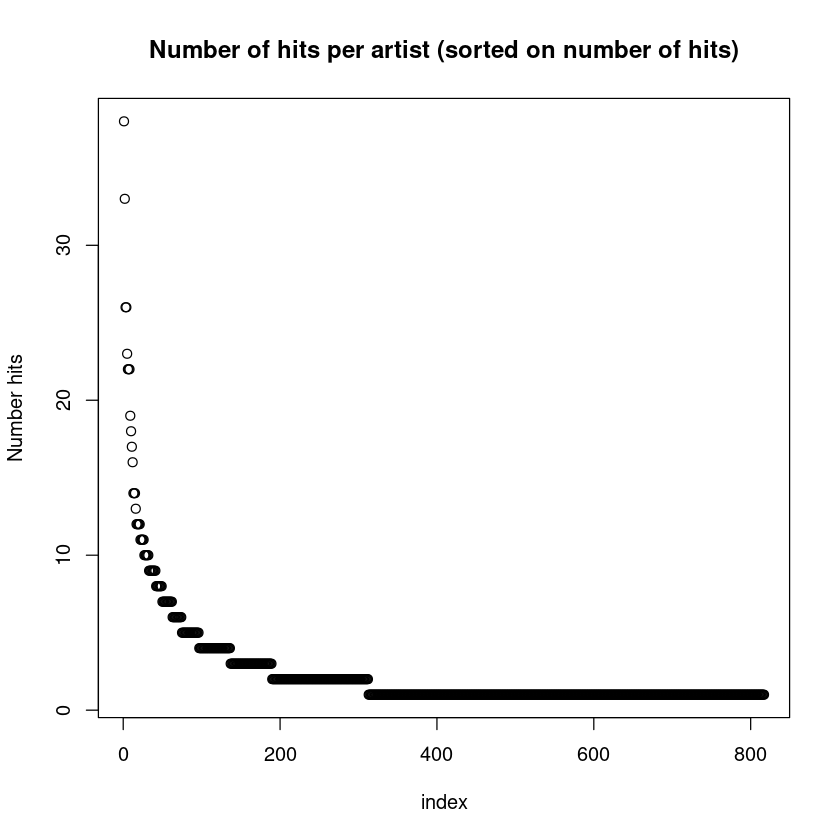

In [5]:
nr_hits_per_artist <- tapply(rep(c(1), 
                                 length(artists_per_song)), 
                             artists_per_song, 
                             sum)
nr_hits_per_artist_sorted <- sort(nr_hits_per_artist, decreasing = TRUE)

plot(nr_hits_per_artist_sorted, 
     main = "Number of hits per artist (sorted on number of hits)", 
     xlab = "index", ylab = "Number hits")

head(nr_hits_per_artist_sorted, 10)

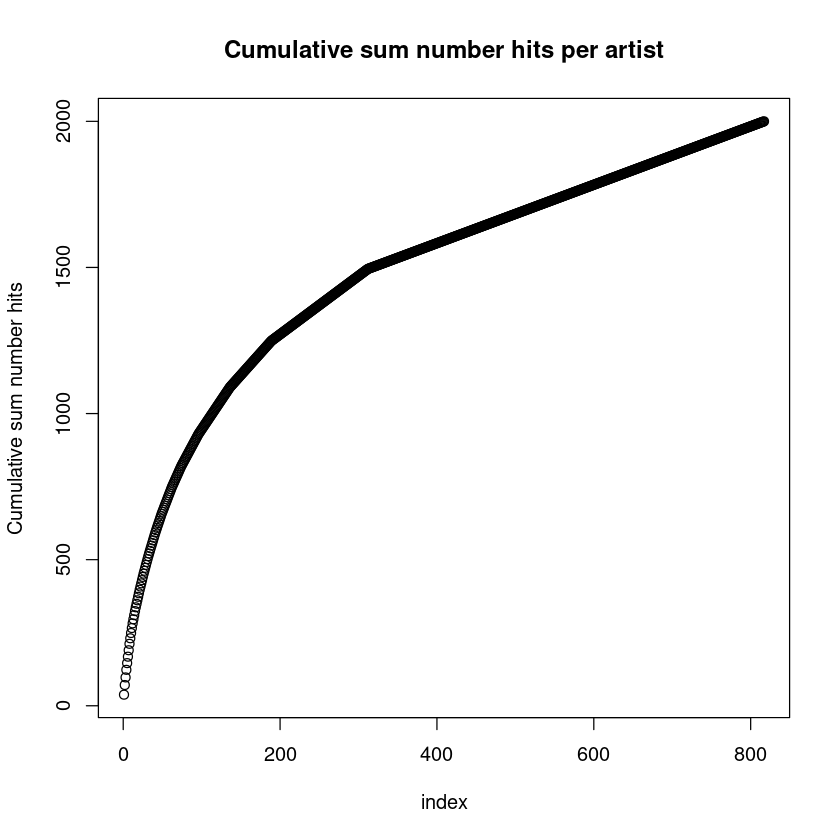

In [6]:
cumsum_hits_per_artist_sorted <- cumsum(nr_hits_per_artist_sorted)
plot(cumsum_hits_per_artist_sorted, 
     main = "Cumulative sum number hits per artist", 
     xlab = "index", ylab = "Cumulative sum number hits")

Observation: We see that the 100 most popular artists cover almost half of the chart.

# Release year statistics

In [7]:
years <- top2000[, 4]
year_average <- mean(years)

cat("Average release year: ", year_average)

unique_years <- sort(unique(years))
cat("\nNumber of unique years: ", length(unique_years))
cat("\nRelease period: ", 
            min(unique_years), 
            "-",
            max(unique_years), 
            " (",
            max(unique_years) - (min(unique_years) - 1),
            "years )"
   )

Average release year:  1988.92
Number of unique years:  63
Release period:  1956 - 2018  ( 63 years )

Observation: every year in the release period has hits

# Number of hits per year

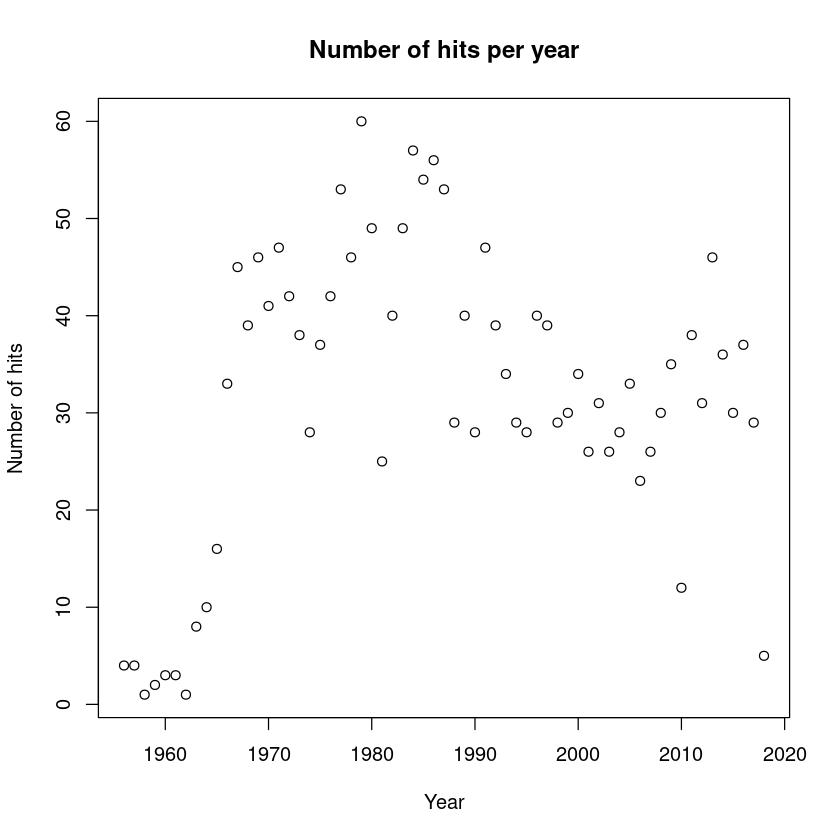

In [8]:
unitvector <- rep(1, 2000)
histo <- tapply(unitvector, years, sum) # groupby op year

plot(names(histo), histo, 
     main = "Number of hits per year", 
     xlab = "Year", ylab = "Number of hits")

### We apply a window function to make the plot more readable

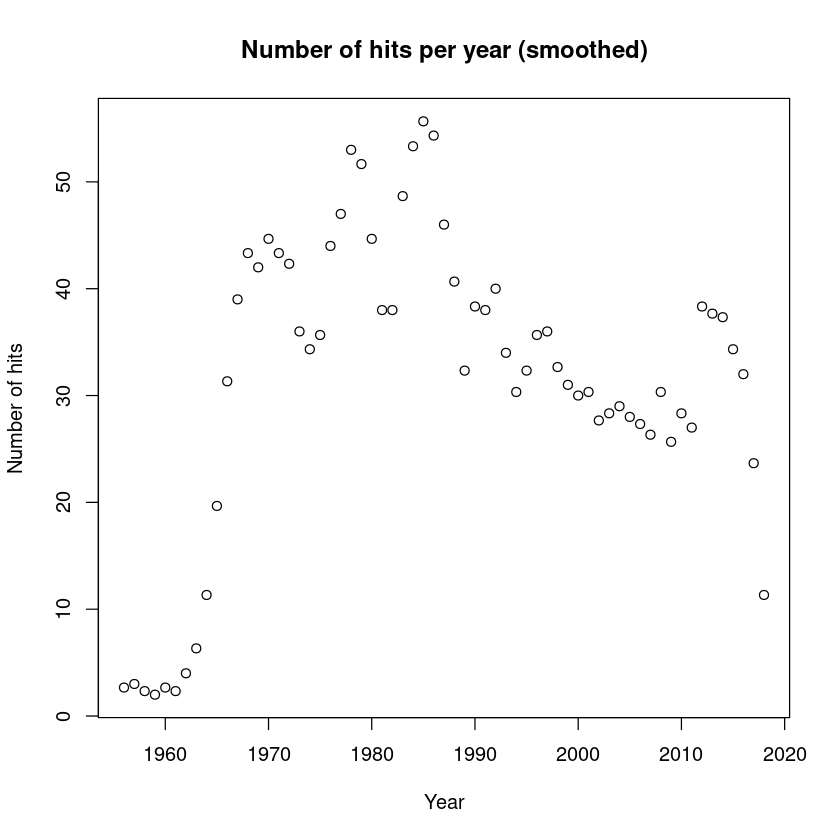

In [8]:
unique_years_str <- NULL
for (y in unique_years) unique_years_str <- c(unique_years_str, toString(y))


make_smooth <- function(histo_in, unique_years_in, cinqlet_mode = FALSE) {

  triplet_mode <- ifelse(cinqlet_mode == FALSE, TRUE, FALSE)
  
  histo_data_smooth <- vector(length = 0)
  histo_in_mod <- histo_in
  histo_in_mod["1954"] <- 0
  histo_in_mod["1955"] <- 0
  histo_in_mod["2019"] <- 0
  histo_in_mod["2020"] <- 0

  for (year in unique_years_in) {
    if (triplet_mode == TRUE) {

      triplet <- c(histo_in_mod[toString(strtoi(year) - 1)], 
                   histo_in_mod[year], 
                   histo_in_mod[toString(strtoi(year) + 1)])
      calc_mean <- mean(triplet)

    } else {

      cinqlet <- c(histo_in_mod[toString(strtoi(year) - 2)], 
                   histo_in_mod[toString(strtoi(year) - 1)], 
                   histo_in_mod[year], 
                   histo_in_mod[toString(strtoi(year) + 1)], 
                   histo_in_mod[toString(strtoi(year) + 2)])
      calc_mean <- mean(cinqlet)

    }
    histo_data_smooth[year] <- calc_mean
  }
  return(histo_data_smooth)
  }

histo_smooth <- make_smooth(histo, unique_years_str)

plot(names(histo_smooth), histo_smooth, 
     main = "Number of hits per year (smoothed)", 
     xlab = "Year", ylab = "Number of hits")

Observation:  We see two peaks: one in the late 70ies, and one in the mid 80ies. The peak in the mid 2010s is also noteworthy.

### What are the results if we look at most popular artists versus less popular artists?


In [9]:
most_popular_artists <- names(nr_hits_per_artist_sorted[1:189])   # 3 hits or more
less_popular_artists <- names(nr_hits_per_artist_sorted[190:817])

songs_most_popular_artists <- top2000[top2000[, 3] %in% most_popular_artists, ]
songs_less_popular_artists <- top2000[top2000[, 3] %in% less_popular_artists, ]

cat("Number of songs most popular artists: ", length(songs_most_popular_artists[[2]]), " (3 hits or more)")
cat("\nNumber of songs less popular artists: ", length(songs_less_popular_artists[[2]]))

Number of songs most popular artists:  1249  (3 hits or more)
Number of songs less popular artists:  751

In [10]:
years <- songs_most_popular_artists[, 4]
year_average_most_popular_artists <- mean(years)
years <- songs_less_popular_artists[, 4]
year_average_less_popular_artists <- mean(years)

cat("Average release year (songs most popular artists): ", year_average_most_popular_artists)
cat("\nAverage release year (songs less popular artists): ", year_average_less_popular_artists)

Average release year (songs most popular artists):  1987.572
Average release year (songs less popular artists):  1991.162

#### Hits per year for most popular artists

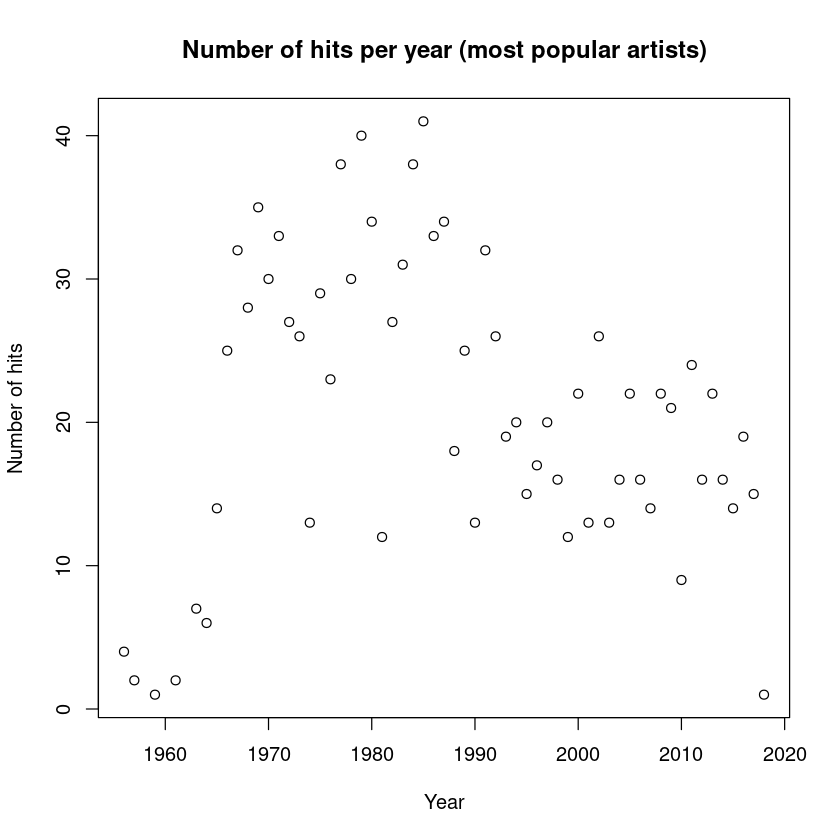

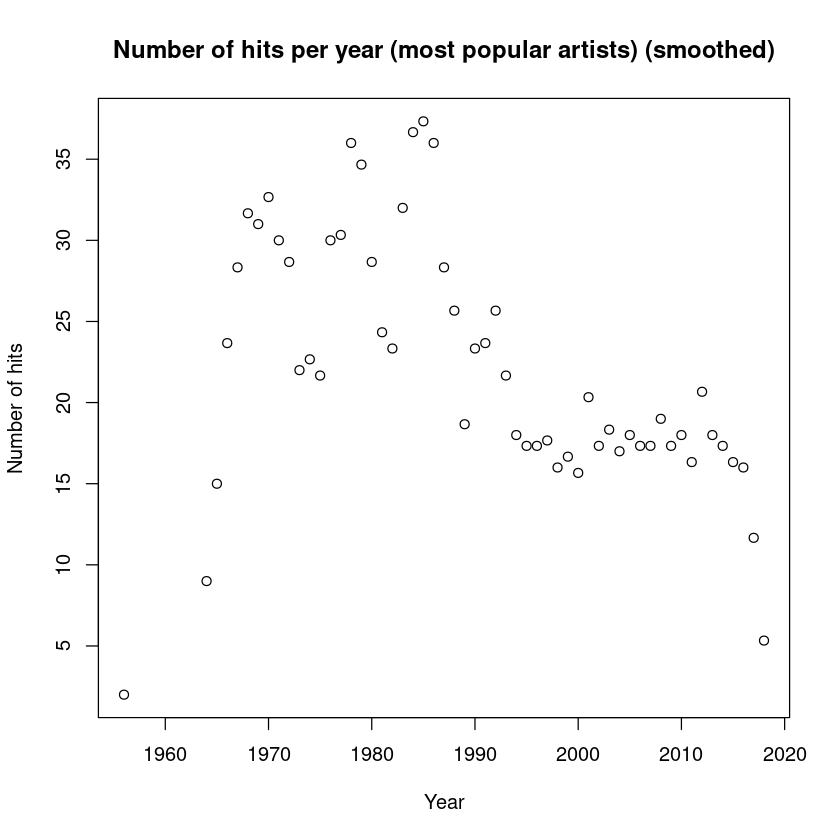

In [11]:
years_of_songs_most_popular_artists <- songs_most_popular_artists[, 4]
years_of_songs_less_popular_artists <- songs_less_popular_artists[, 4]

unitvector <- rep(1, length(years_of_songs_most_popular_artists))
histo_years_of_songs_most <- tapply(unitvector, 
                                    years_of_songs_most_popular_artists, 
                                    sum) # groupby op year
plot(names(histo_years_of_songs_most), histo_years_of_songs_most, 
     main = "Number of hits per year (most popular artists)", 
     xlab = "Year", ylab = "Number of hits")

histo_smooth_years_of_songs_most <- make_smooth(histo_years_of_songs_most, unique_years_str)
plot(names(histo_smooth_years_of_songs_most), histo_smooth_years_of_songs_most, 
     main = "Number of hits per year (most popular artists) (smoothed)", 
     xlab = "Year", ylab = "Number of hits")

#### Hits per year less popular artists

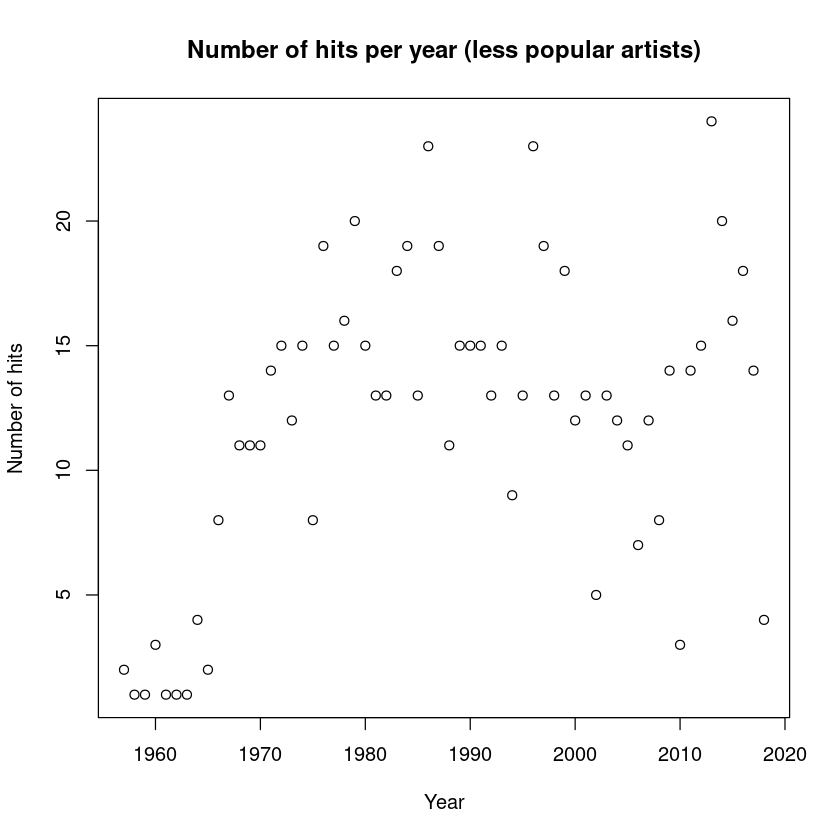

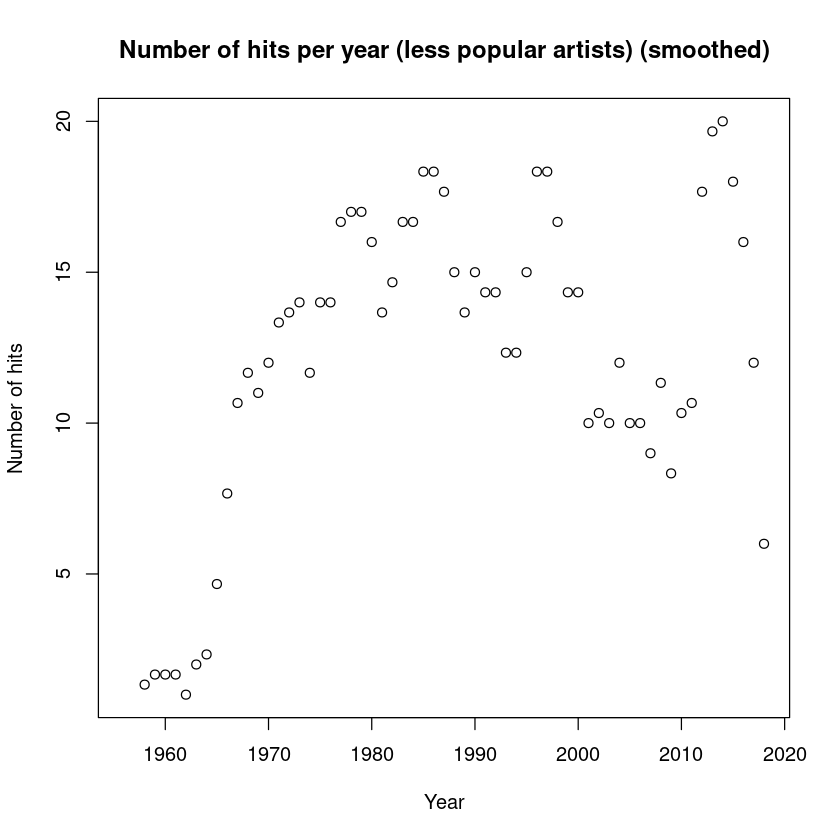

In [12]:
unitvector <- rep(1, length(years_of_songs_less_popular_artists))
histo_years_of_songs_less <- tapply(unitvector, 
                                    years_of_songs_less_popular_artists, 
                                    sum) # groupby op year
plot(names(histo_years_of_songs_less), 
     histo_years_of_songs_less, 
     main = "Number of hits per year (less popular artists)", 
     xlab = "Year", ylab = "Number of hits")

histo_smooth_years_of_songs_less <- make_smooth(histo_years_of_songs_less, unique_years_str)
plot(names(histo_smooth_years_of_songs_less), 
     histo_smooth_years_of_songs_less, 
     main = "Number of hits per year (less popular artists) (smoothed)", 
     xlab = "Year", ylab = "Number of hits")

Observation: 

We see that the release year of most of the hits of the most popular artists is in the period 1970 - 1995

For less popular artists the peak in the mid 2010s is noteworthy.

# Distribution of hits in time per artist (for most popular artists)

### Artists with lowest resp. highest means, with respect to release year of their hits in this chart.

In [50]:
release_years_int <- NULL
for (year in songs_most_popular_artists[, 4]) release_years_int <- c(release_years_int, strtoi(year))

avg_release_year_per_artist <- tapply(release_years_int, 
                                      songs_most_popular_artists[, 3], 
                                      function(x){ round(mean(x), digits = 1) })
head(sort(avg_release_year_per_artist), 5)
tail(sort(avg_release_year_per_artist), 5)

Elvis Presley    Beach Boys       Beatles     Bob Dylan Frank Sinatra 
       1964.8        1966.8        1966.8        1967.0        1967.0

War On Drugs        Bastille      Kensington Imagine Dragons    Shawn Mendes 
         2014.7          2014.8          2014.8          2015.0          2016.0

### Artists with lowest resp. highest standard deviations, with respect to release year of their hits in this chart.

In [51]:
sd_release_year_per_artist <- tapply(release_years_int, 
                                     songs_most_popular_artists[, 3], 
                                     function(x){ round(sd(x), digits = 1) })
head(sort(sd_release_year_per_artist), 5)
tail(sort(sd_release_year_per_artist), 5)

Black Keys Crosby, Stills, Nash & Young 
                         0.0                          0.0 
   Frankie Goes To Hollywood                Tracy Chapman 
                         0.0                          0.0 
               Amy Winehouse 
                         0.4

Boudewijn De Groot        Roy Orbison                Who        Johnny Cash 
              14.0               14.7               15.1               16.7 
     Leonard Cohen 
              18.5

### We will look at the following artists in more detail:

In [52]:
cat("\n                             mean     std\n\n")

for (artist in list('Frankie Goes To Hollywood', 'R.E.M.', 'Elton John')) {
    cat(format(artist, width=28), 
        format(as.character(avg_release_year_per_artist[artist]), width=8, justify = "left"), 
        format(as.character(sd_release_year_per_artist[artist]), width=6, justify = "left"), '\n')
}
cat("\n")


                             mean     std

Frankie Goes To Hollywood    1984     0      
R.E.M.                       1991.2   1.7    
Elton John                   1981.6   10.4   



Observation:<br>

- All hits of Frankie Goes to Hollywood  were released in 1984:<br>

    537&nbsp;&nbsp;  The Power Of Love - Frankie Goes To Hollywood 1984<br>
    1606 Two Tribes - Frankie Goes To Hollywood 1984<br>
    1622 Relax - Frankie Goes To Hollywood 1984<br>


- All hits of R.E.M. were released in more or less the same period:<br>

    84&nbsp;&nbsp;&nbsp;&nbsp;   Losing My Religion                     - R.E.M. 1991<br>
    166&nbsp;&nbsp;  Everybody Hurts                        - R.E.M. 1993<br>
    586&nbsp;&nbsp;  Nightswimming                          - R.E.M. 1992<br>
    849&nbsp;&nbsp;  Man On The Moon                       -  R.E.M. 1992<br>
    1136 The One I Love                        -  R.E.M. 1991<br>
    1227 Drive                                 -  R.E.M. 1992<br>
    1419 Shiny Happy People                    -  R.E.M. 1991<br>
    1587 It's The End Of The World As We Know It - R.E.M. 1987<br>
    1980 Find The River                        -  R.E.M. 1992<br>


- Elton John is an example of an artist with hits over multiple decades:<br>

    257&nbsp;&nbsp;  Your Song                       -   Elton John 1971<br>
    482&nbsp;&nbsp;  Rocket Man                      -   Elton John 1972<br>
    684&nbsp;&nbsp;  Circle Of Life                  -   Elton John 1994<br>
    860&nbsp;&nbsp;  Nikita                          -   Elton John 1985<br>
    1032 Tiny Dancer                      -  Elton John 1971<br>
    1038 Candle In The Wind '97           -  Elton John 1997<br>
    1103 I'm Still Standing               -  Elton John 1983<br>
    1523 Can You Feel The Love Tonight    -  Elton John 1994<br>
    1822 Sorry Seems To Be The Hardest Word - Elton John 1976<br>
    1960 Daniel                           -  Elton John 1973

# Most popular artists ranked by a popularity measure

We want to find out which artists are most popular.<br>
Popularity correlates with number of hits in the chart, but also with (the average) position of an artists hits in the chart.<br>

An artist with a few hits, might still be considered very popular, when these hits are ranked<br>
in the top 100 of the chart.<br>

We will investigate three different popularity measures<br>
<br>
 __linear__<br>
    pos &nbsp;&nbsp;&nbsp; 1 to pos 2000 -> linear decreasing from 2000 to 1 point<br>
<br>
 __logarithmic and discrete (soft)__<br>
    pos &nbsp;&nbsp;&nbsp; 1 to pos &nbsp;&nbsp;&nbsp; 10    -> 8 points<br>
    pos &nbsp;&nbsp;11 to pos &nbsp;&nbsp;100   -> 4 points<br>
    pos 101 to pos &nbsp;&nbsp;500   -> 2 points<br>
    pos 501 to pos 2000  -> 1 point<br>
<br>
 __logarithmic and discrete (strong)__<br>
    pos &nbsp;&nbsp;&nbsp;&nbsp;1 to pos &nbsp;&nbsp;&nbsp;&nbsp;10    -> 27 points<br>
    post &nbsp;11 to pos &nbsp;&nbsp;100   -> 9 points<br>
    pos 101 to pos &nbsp;&nbsp;500   -> 3 points<br>
    pos 501 to pos 2000  -> 1 point<br>


#### Top 10 in case of a linear performance measure

In [37]:
scores_linear <- 2000:1
songs <- c(top2000, list(scores_linear))

popularity_per_artist_linear <- tapply(as.numeric(songs[[5]]), songs[[3]], sum)
popularity_per_artist_linear <- sort(popularity_per_artist_linear, decreasing = TRUE)

head(popularity_per_artist_linear, 10)

Queen           Beatles              ABBA   Michael Jackson 
            47107             35413             28217             27560 
               U2    Rolling Stones          Coldplay Bruce Springsteen 
            26493             24781             24398             24209 
      David Bowie     Fleetwood Mac 
            22669             22245

#### Top 10 in case of a soft logarithmic performance measure

In [38]:
scores_log_step <- c(rep(c(8), 10), 
                     rep(c(4), 90), 
                     rep(c(2), 400), 
                     rep(c(1), 1500))
songs <- c(songs, list(scores_log_step))

popularity_per_artist_log_step <- tapply(as.numeric(songs[[6]]), songs[[3]], sum)
popularity_per_artist_log_step <- sort(popularity_per_artist_log_step, decreasing = TRUE)

head(popularity_per_artist_log_step, 10)

Queen           Beatles          Coldplay    Rolling Stones 
               68                50                44                40 
               U2   Michael Jackson        Pink Floyd              ABBA 
               39                33                32                31 
Bruce Springsteen      Dire Straits 
               31                28

#### Top 10 in case of a strong logarithmic performance measure

In [39]:
scores_log_step2 <- c(rep(c(27), 10), 
                      rep(c(9), 90), 
                      rep(c(3), 400), 
                      rep(c(1), 1500))
songs <- c(songs, list(scores_log_step2))

popularity_per_artist_log_step2 <- tapply(as.numeric(songs[[7]]), songs[[3]], sum)
popularity_per_artist_log_step2 <- sort(popularity_per_artist_log_step2, decreasing = TRUE)

head(popularity_per_artist_log_step2, 10)

Queen       Coldplay     Pink Floyd        Beatles Rolling Stones 
           127             80             70             66             62 
            U2      Pearl Jam   Dire Straits      Metallica     Billy Joel 
            61             52             51             49             46

# Analysis

**Queen**<br>
       number of hits             : 33

       popularity (lin)      : 47107 / 1.0
       popularity (log_step) : 68 / 1.0
       popularity (log_step2): 127 / 1.0

A lot of hits, 1 in the top 10, 7 in the top 100


**Beatles**<br>
       number of hits           : 38

       popularity (lin)      : 35413 / 0.75
       popularity (log_step) : 50 / 0.73
       popularity (log_step2): 66 / 0.51

A lot of hits, but only 2 in the top 100 (!).

This explains why the Beatles are not in the top 3 anymore, when we choose the strong logarithmic performance measure.


**Rolling Stones**<br>
       number of hits    : 26

       popularity (lin)      : 24781 / 0.52
       popularity (log_step) : 40 / 0.58
       popularity (log_step2): 62 / 0.48

A lot of hits, 4 in the top 100, no top 10 hit


**Michael Jackson**<br>
       number of hits   : 22

       popularity (lin)      : 27560 / 0.58
       popularity (log_step) : 33 / 0.48
       popularity (log_step2): 46 / 0.36

A lot of hits, but only 1 in the top 100, then quite some hits in the segment 100 to 500


**Pink Floyd**<br>
       number of hits        : 12

       popularity (lin)      : 19945 / 0.42
       popularity (log_step) : 32 / 0.47
       popularity (log_step2): 70 / 0.55

Quite some hits, 1 in the top 10, 4 in the top 100

This is an example of an artist who scores considerably higher when we apply the strong logarithmic performance measure.


**ABBA**<br>
       number of hits              : 22

       popularity (lin)      : 28217 / 0.59
       popularity (log_step) : 31 / 0.45
       popularity (log_step2): 42 / 0.33

A lot of hits, but only one in the top 100.

When we apply the strong logarithmic performance measure, ABBA disappears from the top 10.